Task3: Please construct a classification algorithm, based on deep neural network, classifying images from CIFAR-10 dataset.

To construct the algorithm you should use the CIFAR-10 training dataset and then use the validation dataset to evaluate the accuracy of the model after each epoch of training.

The solution should be a .ipynb file with Python code loading the data, performing any necessary data transformations, training the described classifier and generating plots of the model accuracy on both training and validation data after each epoch of training. The training procedure should use "patient early stopping" and save the parameters of the best model to a file. After training, the saved model should be loaded from the file and applied to the validation data to calculate and print the accuracy achieved on this data.

Trained model should score at least 70% accuracy on validation data.

***Hints:***
- Think what the "input shape" should be.
- The model should be a deep neural network, but its architecture is up to you.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization

%matplotlib inline

#### Loading data

In [2]:
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.cifar10.load_data()
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')

In [3]:
X_train /= 255
X_val /= 255

In [4]:
input_shape = X_train.shape[1:]

#### Creating model

In [5]:
def create_model():
    res = Sequential()
    res.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=input_shape))
    res.add(BatchNormalization())
    res.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'))
    res.add(BatchNormalization())
    res.add(MaxPooling2D(pool_size=(2,2)))
    res.add(Dropout(0.4))
    
    res.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
    res.add(BatchNormalization())
    res.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
    res.add(BatchNormalization())
    res.add(MaxPooling2D(pool_size=(2,2)))
    res.add(Dropout(0.4))
    
    res.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
    res.add(BatchNormalization())
    res.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
    res.add(BatchNormalization())
    res.add(MaxPooling2D(pool_size=(2,2)))
    res.add(Dropout(0.4))

    res.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
    res.add(BatchNormalization())
    res.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
    res.add(BatchNormalization())
    res.add(MaxPooling2D(pool_size=(2,2)))
    res.add(Dropout(0.4))
    
    res.add(Flatten())
    res.add(Dropout(0.2))
    res.add(Dense(256, activation='relu'))
    res.add(BatchNormalization())
    res.add(Dropout(0.5))
    res.add(Dense(10, activation='softmax'))

    return res

In [6]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

#### Patient early stopping

In [7]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                      mode='min', 
                                      verbose=1, 
                                      patience=5)

mc = tf.keras.callbacks.ModelCheckpoint('best_model.hdf5', 
                                        monitor='val_accuracy', 
                                        mode='max', 
                                        verbose=1, 
                                        save_best_only=True)

#### Compiling model

In [8]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [9]:
epochs = 50
batch_size = 64

In [10]:
history = model.fit(X_train, y_train,
                    epochs=epochs, 
                    batch_size=batch_size,
                    verbose=1,
                    validation_data=(X_val, y_val),
                    callbacks=[es, mc])

Epoch 1/50
782/782 [==============================] - ETA: 0s - loss: 1.8335 - accuracy: 0.3707
Epoch 1: val_accuracy improved from -inf to 0.43620, saving model to best_model.hdf5
782/782 [==============================] - 23s 17ms/step - loss: 1.8335 - accuracy: 0.3707 - val_loss: 1.6371 - val_accuracy: 0.4362
Epoch 2/50
781/782 [============================>.] - ETA: 0s - loss: 1.2182 - accuracy: 0.5646
Epoch 2: val_accuracy improved from 0.43620 to 0.63300, saving model to best_model.hdf5
782/782 [==============================] - 12s 15ms/step - loss: 1.2183 - accuracy: 0.5646 - val_loss: 1.0397 - val_accuracy: 0.6330
Epoch 3/50
780/782 [============================>.] - ETA: 0s - loss: 1.0040 - accuracy: 0.6472
Epoch 3: val_accuracy improved from 0.63300 to 0.69520, saving model to best_model.hdf5
782/782 [==============================] - 12s 16ms/step - loss: 1.0037 - accuracy: 0.6473 - val_loss: 0.8888 - val_accuracy: 0.6952
Epoch 4/50
781/782 [============================>.] 

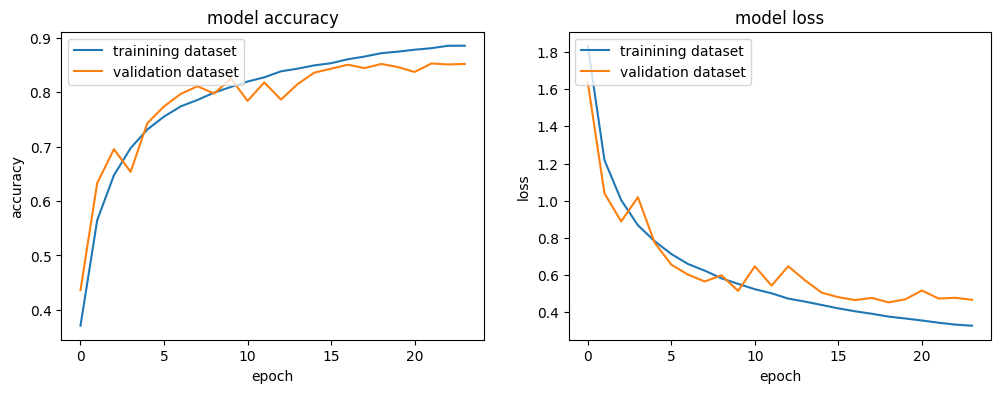

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['trainining dataset', 'validation dataset'], loc='upper left')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['trainining dataset', 'validation dataset'], loc='upper left')

plt.show()

#### Loading and evaluating the best model

In [12]:
best_model = tf.keras.models.load_model('best_model.hdf5')

In [13]:
loss_val, acc_val = best_model.evaluate(X_val, y_val, verbose=1)

313/313 [==============================] - 2s 4ms/step - loss: 0.4743 - accuracy: 0.8528


In [14]:
print(f'Best model\'s accuracy on validation dataset: {acc_val:.3f}')

Best model's accuracy on validation dataset: 0.853
